# Transport Equations

[Transport (or continuity) equations](https://en.wikipedia.org/wiki/Continuity_equation) are some of the simplest and most useful kind of PDEs encountered in physics. They are used to model the transport / movement of some (continuous) quantity.

## Classical Transport Equation

The transport equation is one of the "simplest" partial differential equations, defined by
$$
    u_t + b \cdot \nabla u = 0 \text{ in } \symbb{R}^n \times (0, \infty)
$$
for a fixed vector $b \in \symbb{R}^n$.

We will compute the solution for an instance of this problem numerically.

In [12]:
using ModelingToolkit
using LinearAlgebra
using DomainSets

# Parameters, variables, and derivatives
@parameters t x y
@variables u(..)

Dt = Differential(t)
Dx = Differential(x)
Dy = Differential(y)

∇(u) = [Dx(u), Dy(u)]

# 2D PDE and boundary conditions
b = [1.0, 2.0]

equation = Dt(u(t, x, y)) + b ⋅ ∇(u(t, x, y)) ~ 0

σ = 0.1
normalization_factor = 1 / (sqrt(2 * π) * σ)
u₀(x, y) = normalization_factor * exp(-(x^2 + y^2)/(2 * σ^2))

boundary_conditions = [u(0, x, y) ~ u₀(x, y)]

# Space and time domains
domains = [
    t ∈ Interval(0.0, 3.0),
    x ∈ Interval(-3.0, 3.0),
    y ∈ Interval(-3.0, 3.0)
]

# PDE system
@named pde_system = PDESystem(
    equation, boundary_conditions, domains, 
    # Independent variables
    [t, x, y], 
    # Dependent variables
    [u(t, x, y)]
)

PDESystem
Equations: Equation[2.0Differential(y)(u(t, x, y)) + Differential(x)(u(t, x, y)) + Differential(t)(u(t, x, y)) ~ 0]
Boundary Conditions: Equation[u(0, x, y) ~ 3.989422804014327exp(49.99999999999999(-(x^2) - (y^2)))]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0.0 .. 3.0), Symbolics.VarDomainPairing(x, -3.0 .. 3.0), Symbolics.VarDomainPairing(y, -3.0 .. 3.0)]
Dependent Variables: Num[u(t, x, y)]
Independent Variables: Num[t, x, y]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [13]:
using MethodOfLines

# Method of lines discretization
N = 32
order = 2
discretization = MOLFiniteDifference([x => N, y => N], t)

MOLFiniteDifference{MethodOfLines.CenterAlignedGrid, MethodOfLines.ScalarizedDiscretization}(Dict{Num, Int64}(y => 32, x => 32), t, 2, UpwindScheme(1), MethodOfLines.CenterAlignedGrid(), true, false, MethodOfLines.ScalarizedDiscretization(), true, Any[], Base.Pairs{Symbol, Union{}, Tuple{}, @NamedTuple{}}())

In [14]:
# Convert the PDE problem into an ODE problem
ode_problem = discretize(pde_system, discretization);

In [15]:
# Solve ODE problem
using OrdinaryDiffEq
solution = solve(ode_problem, Tsit5(), saveat=0.1)
solution.retcode

ReturnCode.Success = 1

In [16]:
# Plot results
discrete_x = solution[x]
discrete_y = solution[y]
discrete_t = solution[t]
solution_u = solution[u(t, x, y)]
;

[ Info: Saved animation to /Users/gabrielmajeri/Projects/Doctorat/PhysicsSimulations/notebooks/tmp.gif


Plots.AnimatedGif("/Users/gabrielmajeri/Projects/Doctorat/PhysicsSimulations/notebooks/tmp.gif")
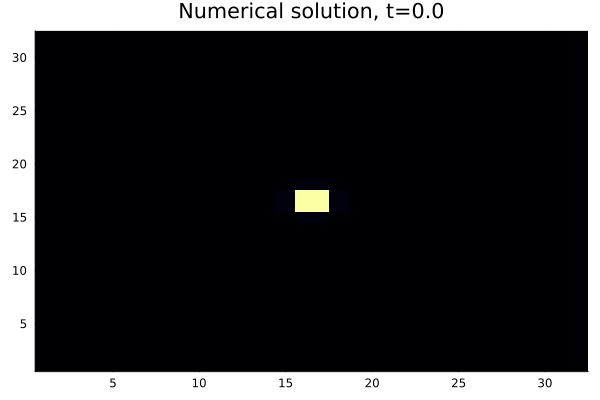

In [17]:
using Plots

default(legend = false)

@gif for i in eachindex(discrete_t)
    plt = heatmap(solution_u[i, :, :], title="Numerical solution, t=$(discrete_t[i])")
end fps=4

## Modified Transport Equation

To make things more interesting, let's add an extra term to the classical transport equation.
$$
    u_t + b \cdot \nabla u + c u = 0 \text{ in } \symbb{R}^n \times (0, \infty)
$$
for constant $b \in \symbb{R}^n$ and $c \in \symbb{R}$.

In [18]:
b = 0.5 * [2.0, 1.0]
c = 5.0

equation = Dt(u(t, x, y)) + b ⋅ ∇(u(t, x, y)) + c * u(t, x, y) ~ 0

σ = 0.1
normalization_factor = 1.0 / (sqrt(2.0 * π) * σ)
u₀(x, y) = normalization_factor * exp(-(x^2 + y^2)/(2 * σ^2))
boundary_conditions = [u(0, x, y) ~ u₀(x, y)]

# Space and time domains
domains = [
    t ∈ Interval(0.0, 2.5),
    x ∈ Interval(-3.0, 3.0),
    y ∈ Interval(-3.0, 3.0)
]

# PDE system
@named pde_system = PDESystem(
    equation, boundary_conditions, domains, 
    # Independent variables
    [t, x, y], 
    # Dependent variables
    [u(t, x, y)]
)

PDESystem
Equations: Equation[5.0u(t, x, y) + 0.5Differential(y)(u(t, x, y)) + Differential(x)(u(t, x, y)) + Differential(t)(u(t, x, y)) ~ 0]
Boundary Conditions: Equation[u(0, x, y) ~ 3.989422804014327exp(49.99999999999999(-(x^2) - (y^2)))]
Domain: Symbolics.VarDomainPairing[Symbolics.VarDomainPairing(t, 0.0 .. 2.5), Symbolics.VarDomainPairing(x, -3.0 .. 3.0), Symbolics.VarDomainPairing(y, -3.0 .. 3.0)]
Dependent Variables: Num[u(t, x, y)]
Independent Variables: Num[t, x, y]
Parameters: SciMLBase.NullParameters()
Default Parameter ValuesDict{Any, Any}()

In [19]:
# Convert the PDE problem into an ODE problem
ode_problem = discretize(pde_system, discretization)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 2.5)
u0: 1024-element Vector{Float64}:
 0.0
 0.0
 0.0
 1.2e-322
 3.8814614104766144e-303
 3.0549279973299973e-285
 5.6767147902553794e-269
 2.4904828852253684e-254
 2.5796479361660066e-241
 6.308523220908785e-230
 3.6423809319032585e-220
 4.965161873655312e-212
 1.5979818799333669e-205
 ⋮
 4.965161873655312e-212
 3.6423809319032585e-220
 6.308523220908785e-230
 2.5796479361660066e-241
 2.4904828852253684e-254
 5.6767147902553794e-269
 3.0549279973299973e-285
 3.8814614104766144e-303
 1.2e-322
 0.0
 0.0
 0.0

In [20]:
# Solve ODE problem
using OrdinaryDiffEq
solution = solve(ode_problem, Tsit5(), saveat=0.1);
solution.retcode

ReturnCode.Success = 1

In [21]:
# Plot results
discrete_x = solution[x]
discrete_y = solution[y]
discrete_t = solution[t]
solution_u = solution[u(t, x, y)];

[ Info: Saved animation to /Users/gabrielmajeri/Projects/Doctorat/PhysicsSimulations/notebooks/tmp.gif


Plots.AnimatedGif("/Users/gabrielmajeri/Projects/Doctorat/PhysicsSimulations/notebooks/tmp.gif")
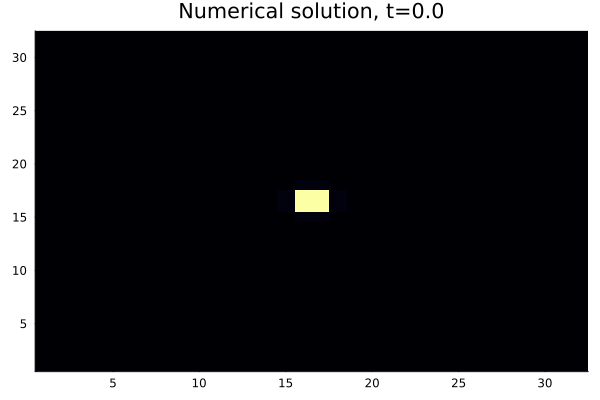

In [22]:
using Plots

default(legend = false)

@gif for i in eachindex(discrete_t)
    plt = heatmap(solution_u[i, :, :], title="Numerical solution, t=$(discrete_t[i])")
end fps=4